## Contents
1) Importing Libraries and Dataframe
2) Imported Data Check & Cleaning
3) Exploring Relationships
4) Correlation Maps
5) Scatterplot
6) Pair Plot
7) Categorical Plots & Other Graphs
8) Key Questions
9) Hypotheses

### 1. Importing Libraries and Dataframe

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [13]:
# Creating Path

path=r'C:\Users\Drew\Superstore'

In [14]:
# Importing Dataframe

df_sales=pd.read_csv(r'C:\Users\Drew\Superstore\02 Data\Prepared Data\product_sales_cleaned.csv',index_col=False)

### 2. Imported Data Check & Cleaning

In [21]:
# Visual Check of Imported Datframe

df_sales.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer


In [22]:
# Quick look at rows and columns number check
df_sales.shape

(9993, 21)

In [23]:
# Check on dataframe data types

df_sales.dtypes

order_id                   object
order_date                 object
ship_date                  object
ship_mode                  object
customer_id                object
customer_segment           object
country                    object
city                       object
state                      object
postal_code                object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
total_orders                int64
buyer_behavior_segment     object
dtype: object

In [24]:
# Saving as CSV did not transfer postal code data type change so will be changing again now.

df_sales['postal_code']=df_sales['postal_code'].astype(str)

In [25]:
# Confirming change of postal_code data type

df_sales.dtypes

order_id                   object
order_date                 object
ship_date                  object
ship_mode                  object
customer_id                object
customer_segment           object
country                    object
city                       object
state                      object
postal_code                object
region                     object
product_id                 object
category                   object
sub_category               object
product_name               object
sales                     float64
quantity                    int64
discount                  float64
profit                    float64
total_orders                int64
buyer_behavior_segment     object
dtype: object

### 3. Exploring Relationships

In [26]:
# Creating subset of those data types to be used in map creation

num_cols=df_sales[['sales','quantity','discount','profit','total_orders']]

In [27]:
# Checking creating numerical columns subset

num_cols

,sales,quantity,discount,profit,total_orders
0,261.96,2,0.00,41.91,5
1,731.94,3,0.00,219.58,5
2,14.62,2,0.00,6.87,9
3,957.58,5,0.45,-383.03,15
4,22.37,2,0.20,2.52,15
...,...,...,...,...,...
9988,25.25,3,0.20,4.10,17
9989,91.96,2,0.00,15.63,13
9990,258.58,2,0.20,19.39,13
9991,29.60,4,0.00,13.32,13


In [29]:
# Creating correlation matrix of numerical columns

num_cols.corr()

,sales,quantity,discount,profit,total_orders
sales,1.000000,0.200808,-0.028197,0.479067,-0.003135
quantity,0.200808,1.000000,0.008680,0.066241,-0.001702
discount,-0.028197,0.008680,1.000000,-0.219481,-0.004054
profit,0.479067,0.066241,-0.219481,1.000000,0.003566
total_orders,-0.003135,-0.001702,-0.004054,0.003566,1.000000


### 4. Correlation Maps

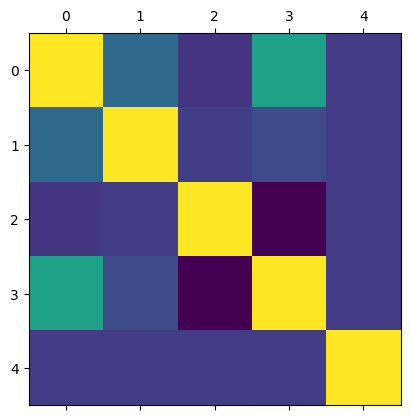

In [30]:
# Creating Correlation Map Using matplotlib

plt.matshow(num_cols.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

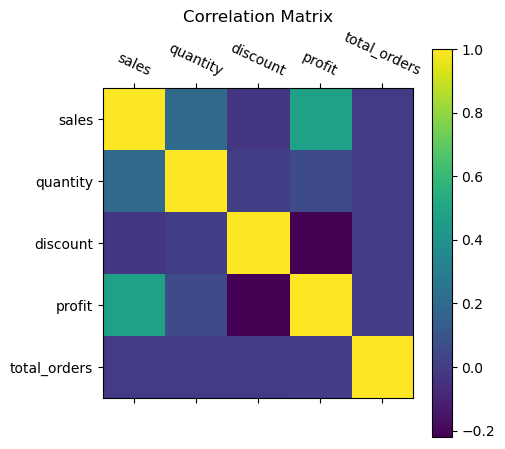

In [53]:
# Adding legend, column names,resizing, and title

f=plt.figure(figsize=(5,5)) # defines figure size 
plt.matshow(num_cols.corr(),fignum=f.number) # defines the type of plot
plt.xticks(range(num_cols.shape[1]),num_cols.columns,fontsize=10,rotation=-25) # Defines x axis label for font and rotation of labels
plt.yticks(range(num_cols.shape[1]),num_cols.columns,fontsize=10) # Defines y axis labels for font and rotation of labels
cb=plt.colorbar() # Creates the color barl legend
cb.ax.tick_params(labelsize=10) # Define the colorbar font size
plt.title('Correlation Matrix',fontsize=12) # Creates title of correlation matrix

Text(0.5, 1.0, 'Correlation HeatMap')

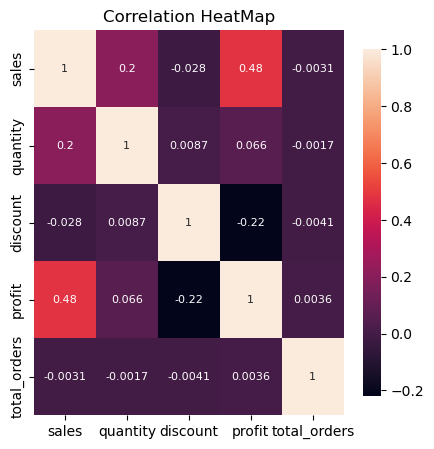

In [71]:
# Creating subplot with matplotlib
# Adjust size of plot map

f,ax=plt.subplots(figsize=(5,5)) # alternative method is plt.figure(figsize=(#,#))
                                 # plt.plot(x,y)

# Creating Correlation Heatmap Using Seaborn
# sns.heatmap indicates type of map
# df.corr() sets information for correlation heatmap
# annot=True allows plot to place correlations coefficients on heatmap
# annot_kws adjusts font size of numbers within boxes
# cbar_kws={''} adjusts size of colorbar itself, not numbers used on colorbar.

heat_corr=sns.heatmap(num_cols.corr(),annot=True,ax=ax,annot_kws={'size':8},cbar_kws={'shrink':0.9})
ax.set_title('Correlation HeatMap',fontsize=12)

### The heatmap shows a correlation between different variables of sales, quantity, discount, profit, and total orders that range from -1 to 1 which shows the strenth and linear relatioship between the variables. In regards to color, the lighter the square the stronger and more positive the relationship, while the darker the square the stronger and more negative the relationship. 
### Sales and profit: show to be 0.48 which can be identified as a moderate positive correlation. This means that as sales increase, profit is likely tending to increase.
### Sales and quantity: show to be 0.20 which is a weak positive correlation and means that as the qunatity of items sold the sales value will possibly increase as well, but there is not a strong correlation between these two.
### Sales and discount: show to be -0.028 which shows a very weak correlation and suggests that discounts do not have a weak linear relationship with sales. This indicates that discounts do not have much affect on the sales value.
### Sales and total orders: show to be -0.0031 which indicates these two have nearly no relationship.
### Profit and quantity: show to be 0.066 which shows a weak positive correlation and indicates that as quantity sold increases, profit could potentially also increase slightly.
### Profit and discount: shows to be -0.22 which is a weak negative correlation between the two values and indicates that as discounts increase, profits may show a decrease.
### Quantity and discount: shows to be 0.0087 which indicates a very weak to almost no relationship at all and any influence between the two is negligible.
### Profit and total orders: show to be 0.0036 which indicates these two have nearly no relationship.

### 5. Scatterplot

Text(0.5, 1.0, 'Scatterplot of Sales vs Quantity')

<Figure size 800x800 with 0 Axes>

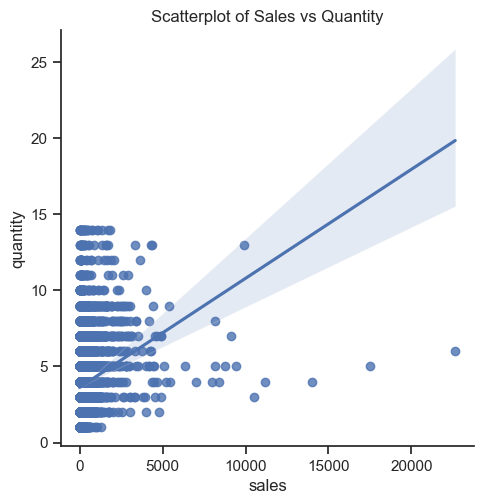

In [232]:
# Creating scatterplot for 'sales' and 'quantity' columns

plt.figure(figsize=(8,8))
sns.lmplot(x='sales',y='quantity',data=num_cols)
plt.title('Scatterplot of Sales vs Quantity',fontsize=12)

### Scatterplot of sales vs quantity: The plot shows a positive linear relationship and shows a general trend that as quantity increases, sales also increase. However, the spread is varied and is not perfectly linear, so it is good to watch for other factors affecting sales.

Text(0.5, 1.0, 'Scatterplot of Sales vs Profit')

<Figure size 800x800 with 0 Axes>

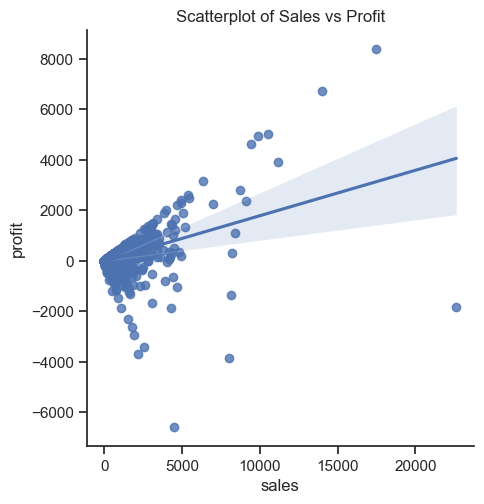

In [233]:
# Creating scatterplot for 'sales' and 'profit'

plt.figure(figsize=(8,8))
sns.lmplot(x='sales',y='profit',data=num_cols)
plt.title('Scatterplot of Sales vs Profit',fontsize=12)

### Scatterplot sales vs profit:The plot shows a rather decently strong linear relationship and generally indicates that as sales increase, profit tends to increase as well. The plot does show a cluster of data points in the low profit value area with a number of outlier points indicating either large profitable sales or heavy losses. 

Text(0.5, 1.0, 'Scatterplot of Profit vs Discounts')

<Figure size 800x800 with 0 Axes>

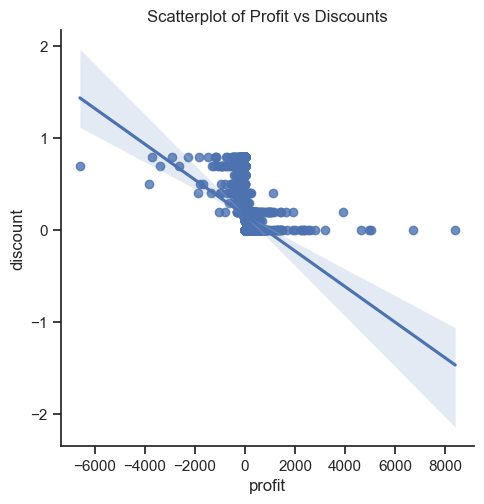

In [236]:
# Creating scatterplot for 'profit' vs 'discount'

plt.figure(figsize=(8,8))
sns.lmplot(x='profit',y='discount',data=num_cols)
plt.title('Scatterplot of Profit vs Discounts',fontsize=12)

### Scatterplot profit vs discount: The plot shows a weak negative correlating relationship and suggests that the higher discounts tend to lessen profits. The trend indicates that as discounts increase, profit usually decreases, however, the relationship is not strong.

### 6. Pair Plot

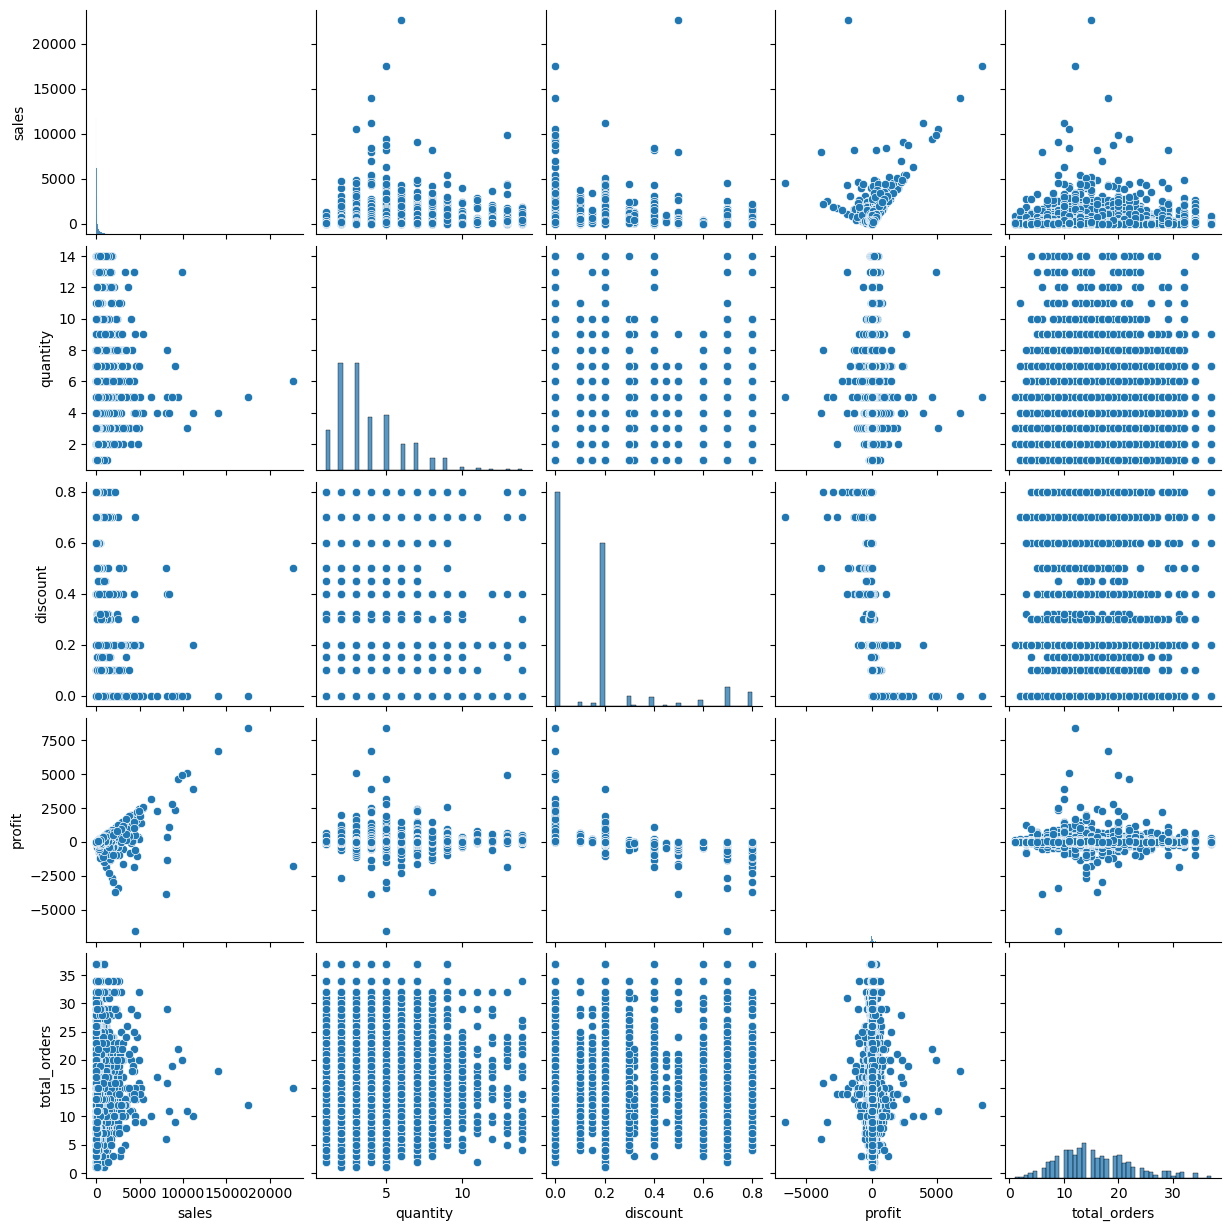

In [104]:
# Creating pair plot 

p_plot=sns.pairplot(num_cols)

### The data appears to be very scattered in a number of different plots, especially those with sales and profit. We can also see that most orders/sales appear to be in the low quantity area. 

### 7. Categorical Plots & Other Graphs

<Axes: xlabel='sales', ylabel='Count'>

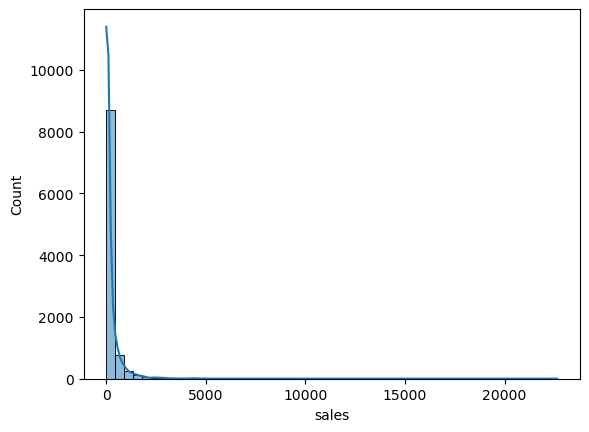

In [117]:
# Creating histogram to visualize sales distribution

sns.histplot(df_sales['sales'],bins=50,kde=True)

<Axes: xlabel='profit', ylabel='Count'>

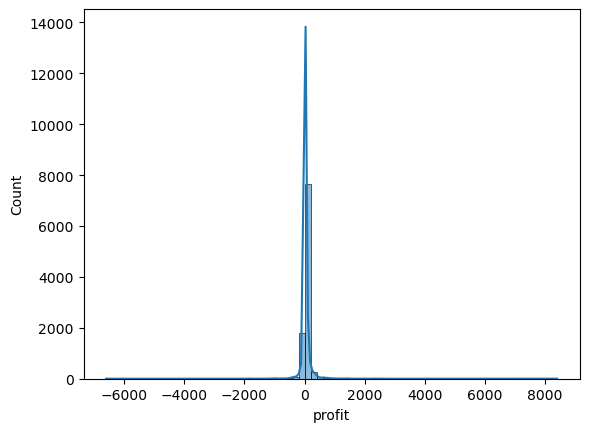

In [127]:
# Creating histogram to visualize profit distribution

sns.histplot(df_sales['profit'],bins=75,kde=True)

<Axes: xlabel='total_orders', ylabel='Count'>

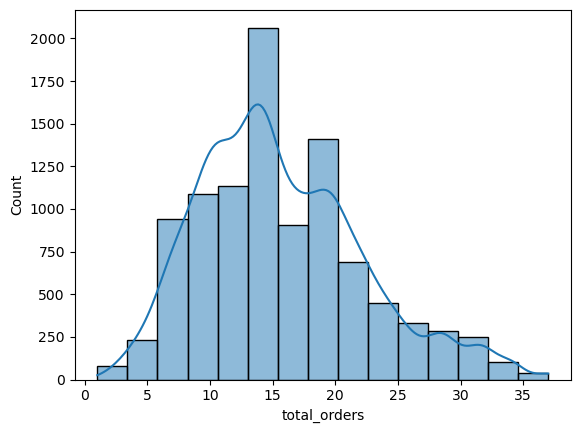

In [131]:
# Creating histogram to visualize customer total orders

sns.histplot(df_sales['total_orders'],bins=15,kde=True)

Text(0.5, 1.05, 'Sales vs Profit by Region (Outliers Only)')

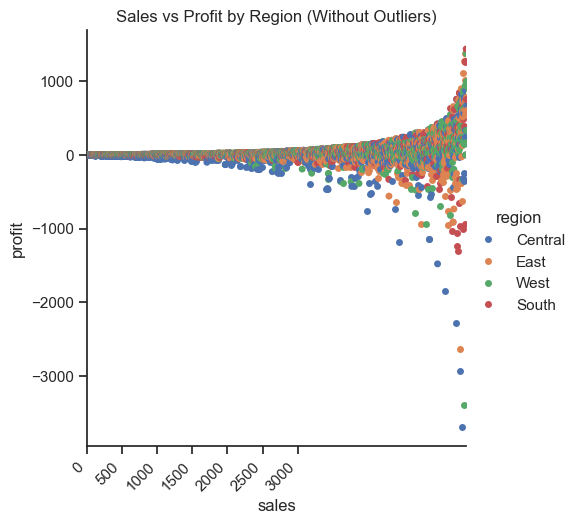

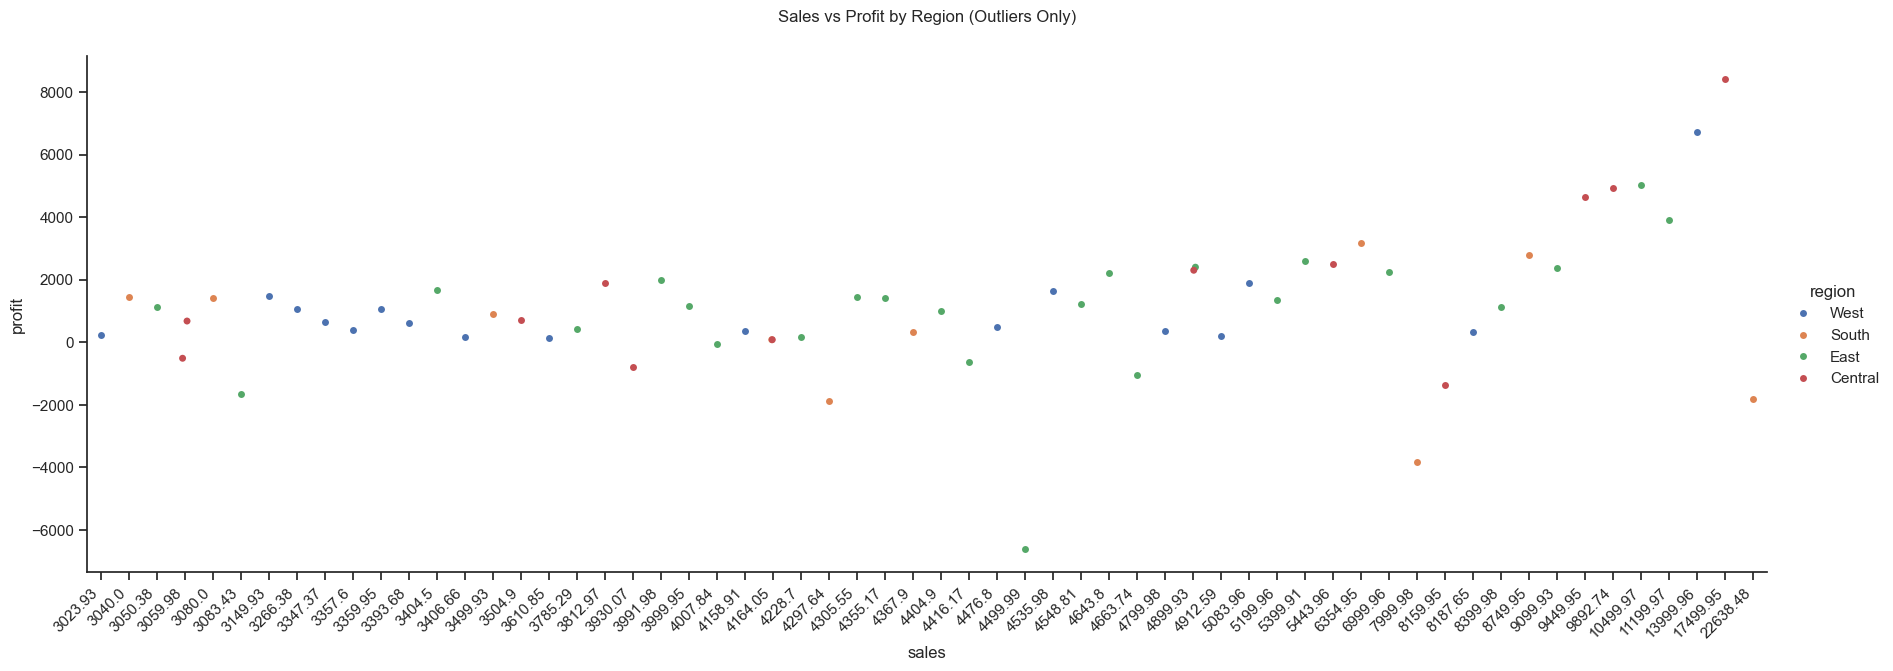

In [192]:
# Creating categorical chart on 'sales', 'profit', and'region'
# Due to sales having large sales numbers, the chart was not getting created correctly and I have decided to make two. Without outliers and one only using outliers.

# Creating subset by with and without outliers.
outlier_boundary=3000
sub_no_outliers=df_sales[df_sales['sales']<=outlier_boundary]
sub_outliers=df_sales[df_sales['sales']>outlier_boundary]

# Creating categorical chart of no outliers
sns.set(style='ticks')
cat_spr_no_outliers = sns.catplot(x='sales', y='profit', hue='region', data=sub_no_outliers, kind='strip')
cat_spr_no_outliers.set(xticks=np.arange(0, 3001, 500))
cat_spr_no_outliers.set_xticklabels(np.arange(0, 3001, 500), rotation=45, ha='right')
plt.title('Sales vs Profit by Region (Without Outliers)')

# Creating categorical chart of outliers

sns.set(style='ticks')
cat_spr_outliers=sns.catplot(x='sales',y='profit',hue='region',data=sub_outliers,kind='strip',aspect=3, height=6)
plt.xticks(rotation=45, ha='right')
plt.title('Sales vs Profit by Region (Outliers Only)', y=1.05)

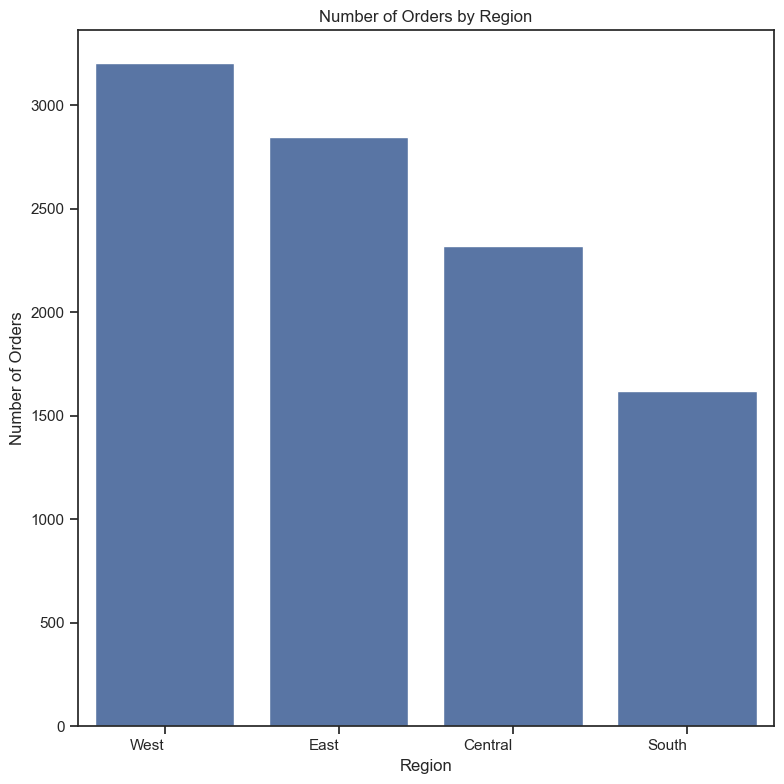

In [248]:
# Counting the number of orders per state
order_count_by_region = df_sales.groupby('region')['order_id'].count().reset_index()
order_count_by_region = order_count_by_region.sort_values(by='order_id', ascending=False)

# Plotting the data
plt.figure(figsize=(8,8))
sns.barplot(x='region', y='order_id',data=order_count_by_region)
plt.xticks(rotation=0, ha='right')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Region')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer Total Orders vs Profit by Buyer Behavior Segments')

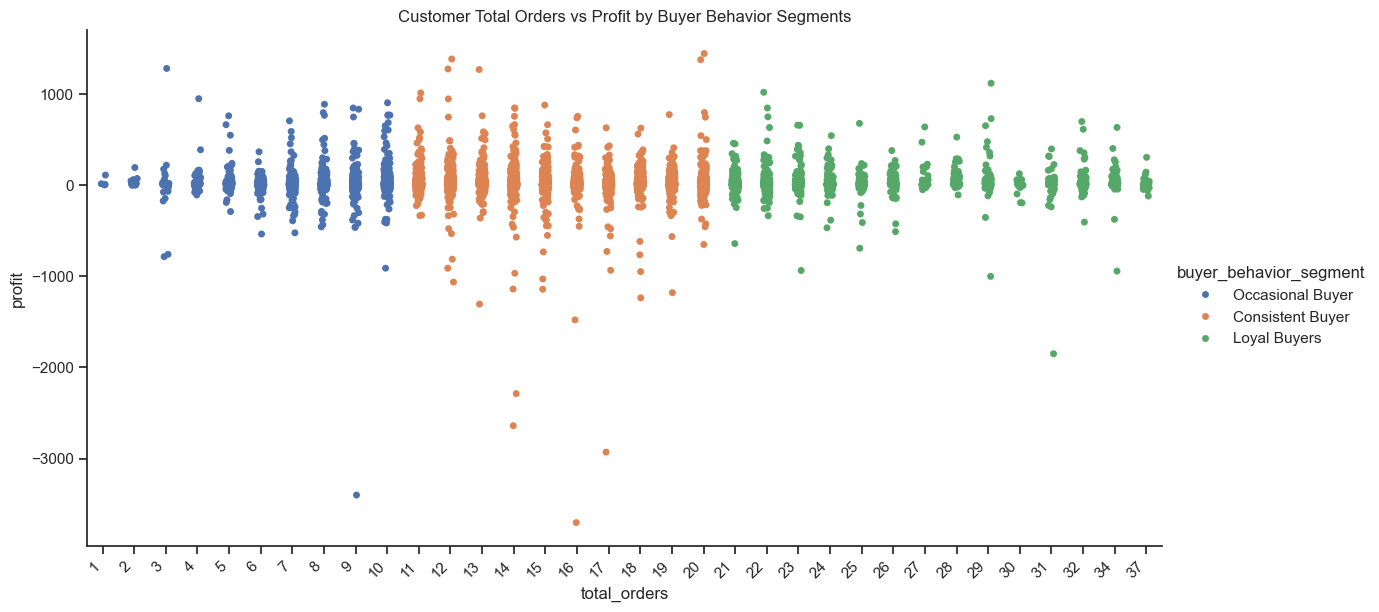

In [237]:
# Creating categorical plot by profit, total_orders, and buyer_behavior_segment

sns.set(style='ticks')
cat_prof_ord_bbs= sns.catplot(x='total_orders', y='profit', hue='buyer_behavior_segment', data=sub_no_outliers, kind='strip',aspect=2, height=6)
plt.xticks(rotation=45, ha='right')
plt.title('Customer Total Orders vs Profit by Buyer Behavior Segments')

Text(0.5, 1.0, 'Order Quantity vs Profit by Buyer Behavior Segment')

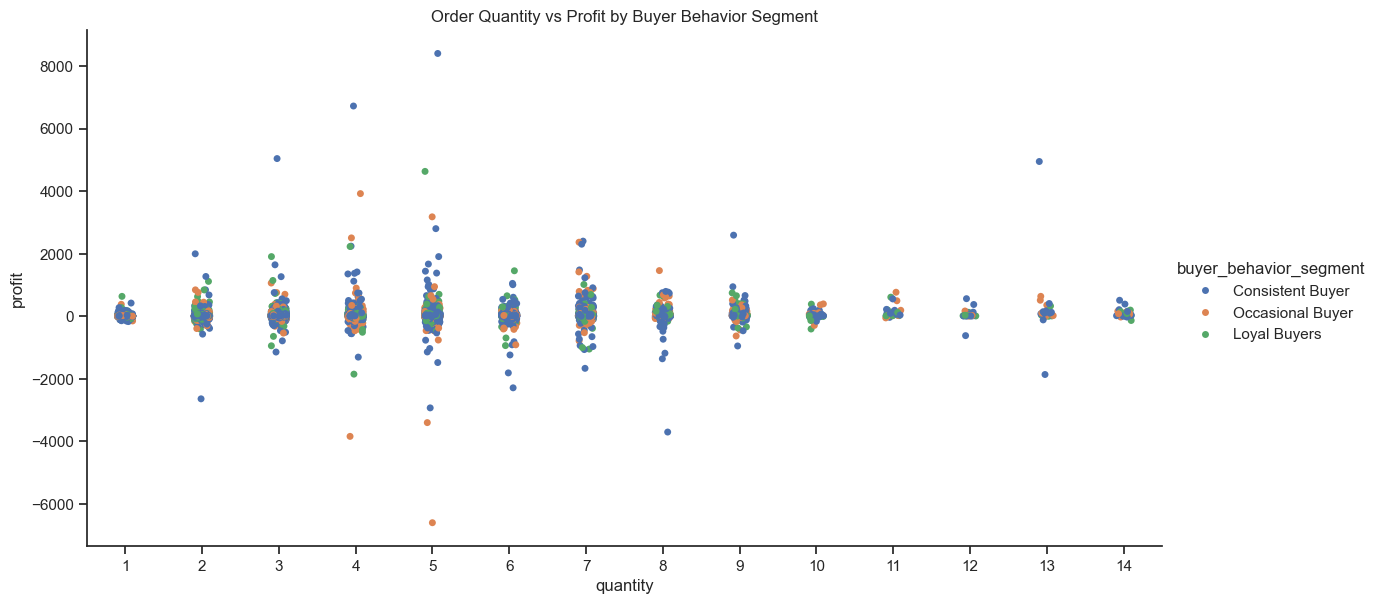

In [244]:
# Creating categorical plot by profit, total_orders, and order ship_mode

sns.set(style='ticks')
cat_qty_prof_bbs= sns.catplot(x='quantity', y='profit', hue='buyer_behavior_segment', data=df_sales, kind='strip',aspect=2, height=6)
plt.title('Order Quantity vs Profit by Buyer Behavior Segment')

In [ ]:
# Creating categorical plot by profit, quantity, and buyer_behavior_segment
sns.set(style='ticks')
cat_prof_ord_bbs= sns.catplot(x='quantity', y='profit', hue='buyer_behavior_segment', data=sub_no_outliers, kind='strip',aspect=2, height=6)
plt.xticks(rotation=45, ha='right')
plt.title('Customer Total Orders vs Profit by Buyer Behavior Segments')

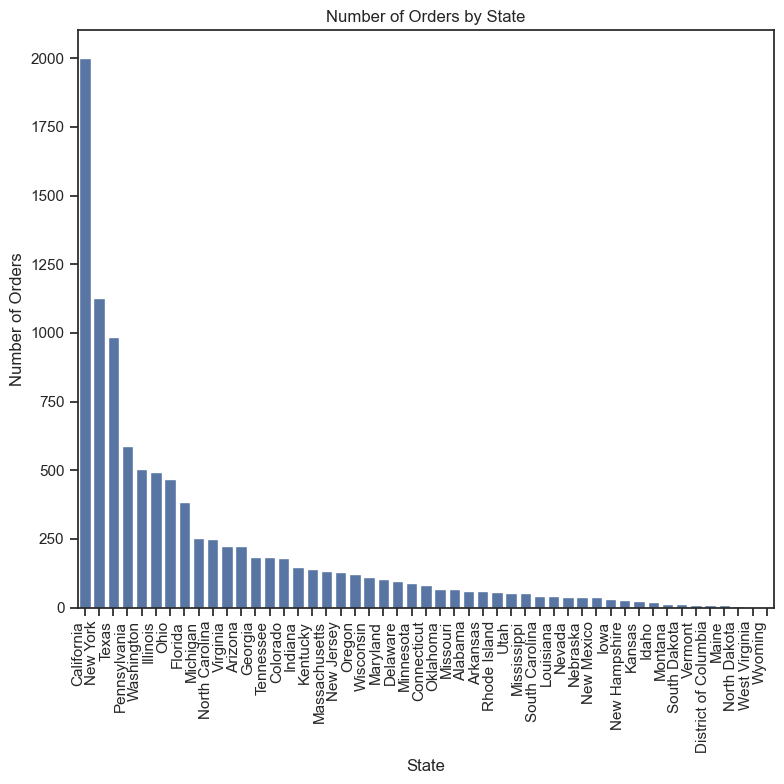

In [221]:
# Counting the number of orders per state
order_count_by_state = df_sales.groupby('state')['order_id'].count().reset_index()
order_count_by_state = order_count_by_state.sort_values(by='order_id', ascending=False)

# Plotting the data
plt.figure(figsize=(8,8))
sns.barplot(x=order_count_by_state['state'], y=order_count_by_state['order_id'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by State')
plt.tight_layout()
plt.show()

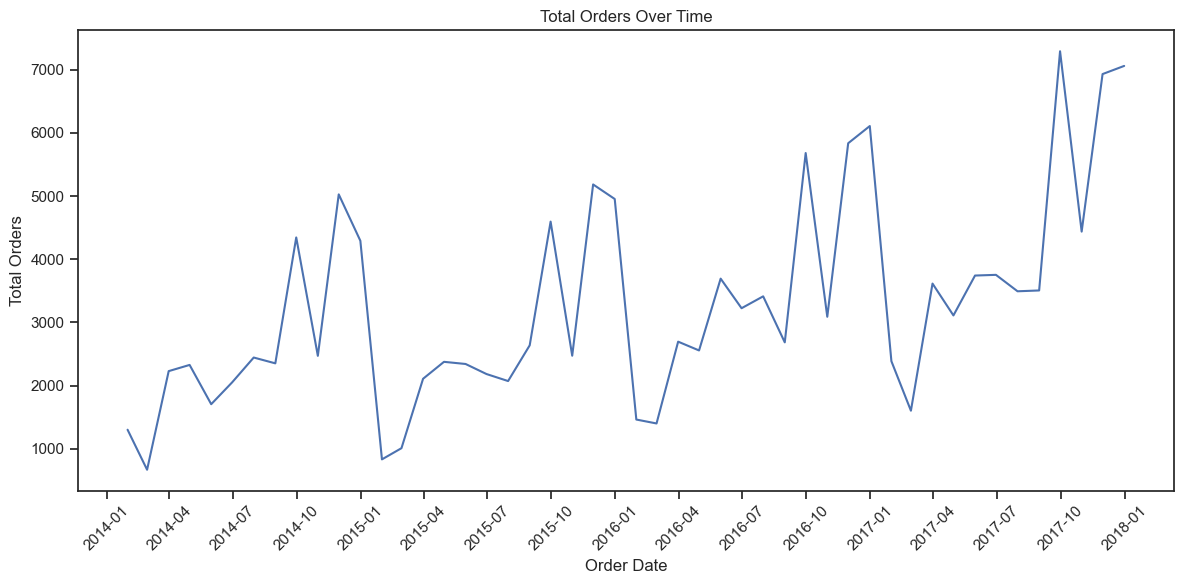

In [211]:
import matplotlib.dates as mdates
# Creating lineplot to analyze order_date by total_orders over time

# Changing data type to datetime format
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

# Grouping by month and aggregating sum of total_orders
orders_by_date = df_sales.resample('ME', on='order_date')['total_orders'].sum().reset_index()


# Creating line graph
plt.figure(figsize=(12,6))
sns.lineplot(x='order_date', y='total_orders', data=orders_by_date)
plt.xlabel('Order Date')
plt.ylabel('Total Orders')
plt.title('Total Orders Over Time')

# Setting the locator and formatter for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


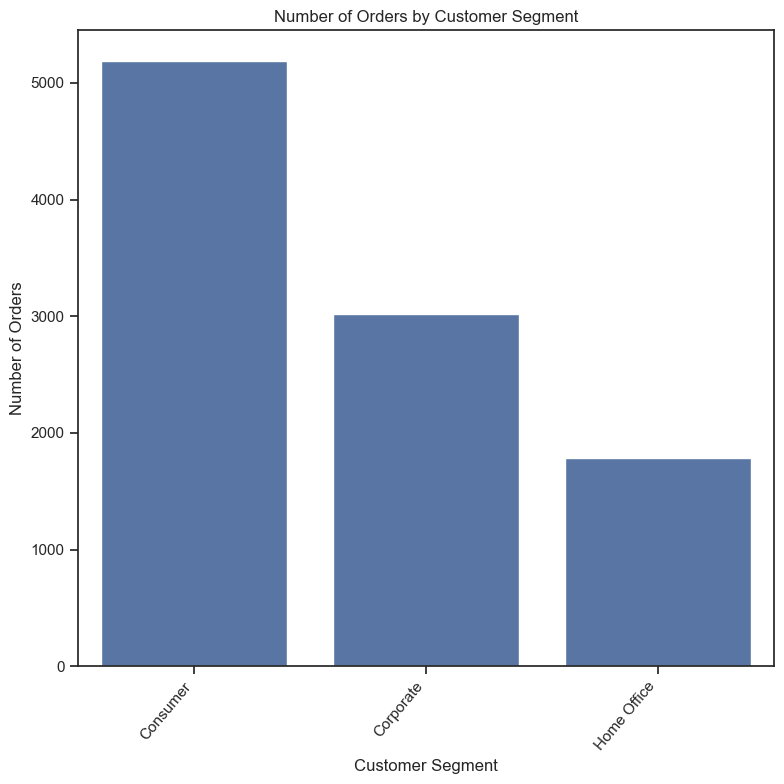

In [214]:
# Counting the number of orders per customer_segment
order_count_by_customer_segment = df_sales.groupby('customer_segment')['order_id'].count().reset_index()

# Plotting the data
plt.figure(figsize=(8,8))
sns.barplot(x=order_count_by_customer_segment['customer_segment'], y=order_count_by_customer_segment['order_id'])
plt.xticks(rotation=50, ha='right')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Customer Segment')
plt.tight_layout()
plt.show()

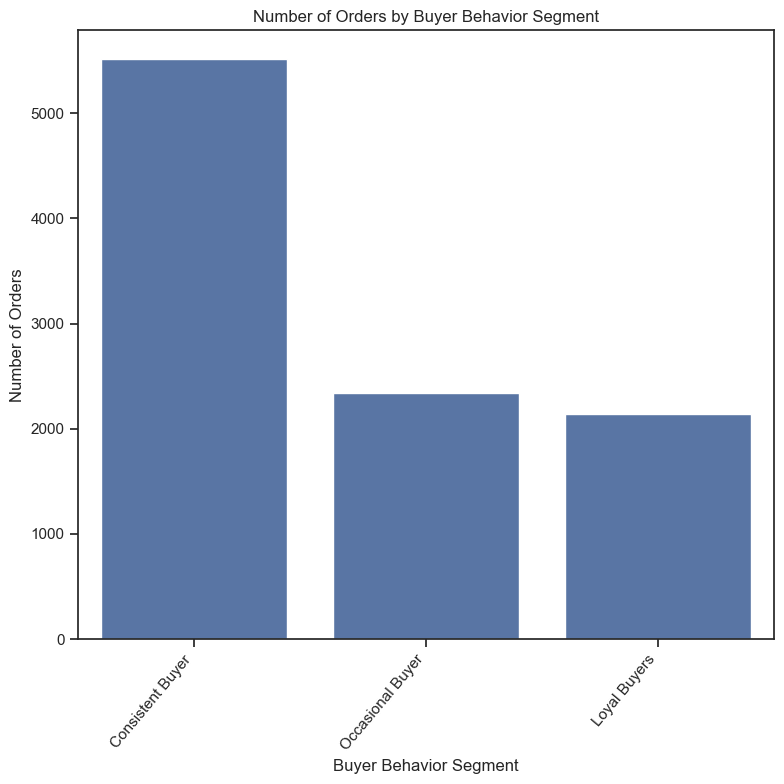

In [230]:
# Counting the number of orders per buyer_behavior_segment
order_count_by_behavior_segment = df_sales.groupby('buyer_behavior_segment')['order_id'].count().reset_index()
order_count_by_behavior_segment = order_count_by_behavior_segment.sort_values(by='order_id', ascending=False)

# Plotting the data
plt.figure(figsize=(8,8))
sns.barplot(x='buyer_behavior_segment', y='order_id',data=order_count_by_behavior_segment)
plt.xticks(rotation=50, ha='right')
plt.xlabel('Buyer Behavior Segment')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Buyer Behavior Segment')
plt.tight_layout()
plt.show()

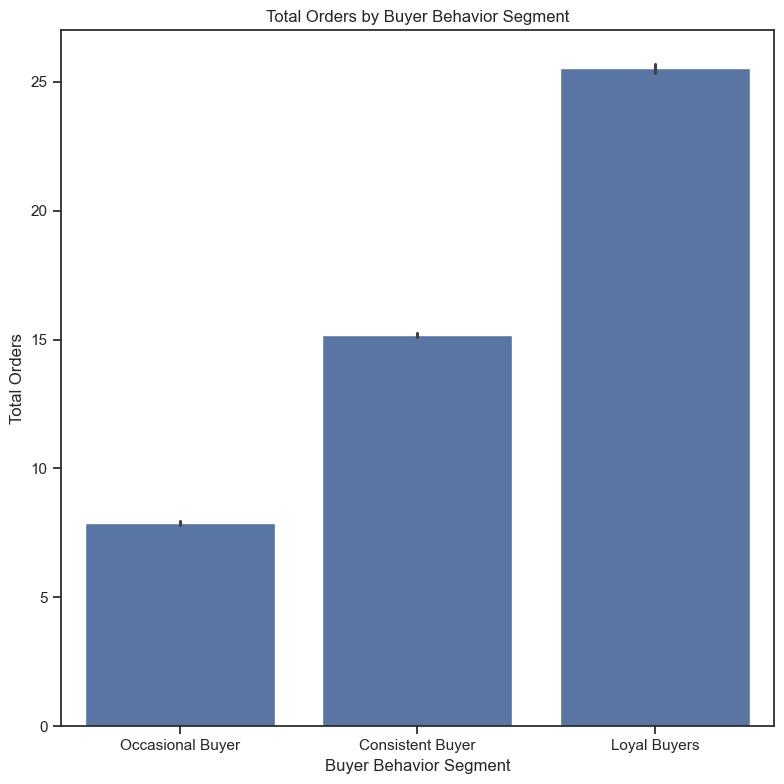

In [229]:
# Plotting Chart for total_orders and buyer behavior segment

plt.figure(figsize=(8,8))
sns.barplot(x='buyer_behavior_segment',y='total_orders',data=df_sales)
plt.xlabel('Buyer Behavior Segment')
plt.ylabel('Total Orders')
plt.title('Total Orders by Buyer Behavior Segment')
plt.tight_layout()
plt.show()

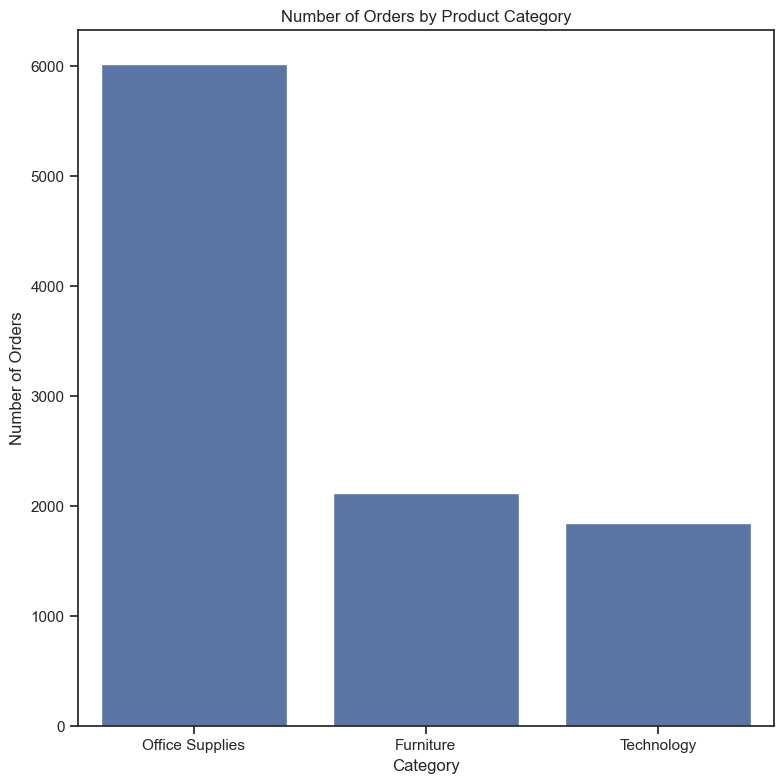

In [222]:
# Counting the number of orders per category
order_count_by_category = df_sales.groupby('category')['order_id'].count().reset_index()
order_count_by_category = order_count_by_category.sort_values(by='order_id', ascending=False)

# Plotting the data
plt.figure(figsize=(8,8))
sns.barplot(x='category', y='order_id',data=order_count_by_category)
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Product Category')
plt.tight_layout()
plt.show()

### 8. Key Questions
1)	What are the purchasing patterns of buyer behavior segments and what pricing strategies can be implemented to maximize profit while maintaining customer satisfaction?
-Consistent Buyers appear to place the most orders and are followed by Occasional Buyers and then Loyal Buyers. However, we can see that Loyal Buyers, while making fewer purchases, they make larger purchases.

2)	How have discounts impacted profits based on customer segments and buyer behavior segments?
-Discounts tend to reduce profit, especially for higher-order quantities in the cases of Loyal Buyers. Discounts generally also fall around the 20% range or lower.

3)	What are the purchasing patterns of customers based on product category to so marketing and sales can tailor strategies to specific customers?
-Office supplies appear to be the dominate product category, followed by Furniture and then Technology. 

4) Which regions have the highest and lowest performing sales?
-The west appears to be performing the best in both number of orders and shows a high concentration of positive profit, indicating a better probability of profitability over other regions. As for the worst performing region, the South appears to be the lowest ranking in terms of number of orders and its probability of having profitable sales. The South seems to have a higher concentration of negative profits and indicates the region to be an unprofitable region. 

5)	Which regions is the company’s primary market base located?
-California, New York, Texas, Pennsylvania, Washington, Illinois, Ohio, Florida, Michigan, and North Carolina show to be the top 10 states with the highest number of orders. 

6)	Which customer segment or buyer segment contributes to the most profit and what strategies can help encourage better customer engagement from poorly performing segments?
-Consistent Buyers make up the majority of number of orders, but Loyal Buyers make up those who make up the higher profit orders.
7) Which months show to be peak order times and which months show to be the slowest for customer order placements?
-Recurring peak patterns can be seen around the mid and end of the year, appearing around holiday season times. Low or slower sale periods appear to be consistent with the early times of the year or those months at the the start of the year. 

### 9. Hypothesis

1) If the West region makes the most overall sales and orders, then it may not have the highest profitability due to factors such as discount strategies, customer behavior, or product preferences.
2) If Consistent Buyers make up the highest number of order, then Loyal Buyers are more likely to generate higher revenue per order. This indicates targeted marketing campaigns might have the potential to convert Consistent Buyers to more profitable Loyal Buyers.
3) If order peaks during mid-year and end-of-year and decrease at the beginning of the year, then increased marketing and sales promotions during slower periods could increase sales in slower months.
4) If Office Supplies make up the popular product category amongst consumers, then tailoring product marketing strategies to segment preferences could increase category sales.
5) If different customer segments contribute to varying profits, then sales and marketing strategy focus should be on the higher profiting segments. 